In [1]:
from random import shuffle
import glob, h5py, pickle, cv2, re
import numpy as np
from IPython.display import clear_output
from pandas import read_csv
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from collections import Counter
import matplotlib.pyplot as plt
width = 128
height = 128
channels = 3

# estimated multi-target case

In [2]:
path = '../data/est_projected_microDoppler/*_proj*.png'
files1 = glob.glob(path)
print(len(files1), 'files')
ang_tol = range(1,46)
acc1 = []

for t in ang_tol:
    
    correct = 0
    wrong = 0
    for i in range(len(files1)):
        fname = files1[i].split('/')[-1]
        if '\\' in fname:
            fname = fname.split('\\')[-1]
        class_idx = [m.end() for m in re.finditer('class', fname)]
        underscore_idx = [m.start() for m in re.finditer('_', fname)]
        classes = np.array([int(c) for c in fname[class_idx[0]: underscore_idx[1]].split('-')])

        angles = fname.split('_')[2][3:]
        plusses = angles.rfind('+')
        minuses = angles.rfind('-')

        if plusses == -1 and minuses == -1:
            all_ang_ids = int(angles)
            angs = all_ang_ids
        elif plusses == -1 and minuses != -1:
            all_ang_ids = sorted([minuses, len(angles)+1])
        elif plusses != -1 and minuses == -1:
            all_ang_ids = sorted([plusses, len(angles)+1])
        else:
            all_ang_ids = sorted([plusses, minuses, len(angles)+1])

        if isinstance(all_ang_ids, list):
            if all_ang_ids[0] == 0:
                angs = np.zeros((len(all_ang_ids) - 1,), dtype=int)
                for x in range(len(all_ang_ids) - 1):
                    angs[x] = int(angles[all_ang_ids[x]:all_ang_ids[x+1]]) # .astype(int)
            else:
                angs = np.zeros((len(all_ang_ids),), dtype=int)
                angs[0] = int(angles[:all_ang_ids[0]])
                for x in range(len(all_ang_ids) - 1):
                    angs[x+1] = int(angles[all_ang_ids[x]:all_ang_ids[x+1]]) # .astype(int)
        proj_ang = int(fname[fname.find('proj')+4: -4])
#         print(fname)
#         print(angs)
        if sum([abs(proj_ang - a) < t for a in angs]) > 0:
            correct += 1
        else:
#             print(i, '. sample')
#             print(proj_ang)
#             print(a)
#             print(t)
            wrong += 1
    acc1.append(correct/(correct + wrong) * 100)

57 files


100.0


Text(0, 0.5, 'Accuracy')

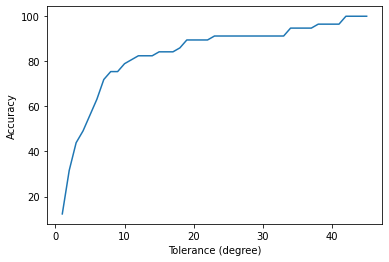

In [3]:
print(acc1[-1])
plt.plot(ang_tol, acc1)
plt.xlabel('Tolerance (degree)')
plt.ylabel('Accuracy')

# estimated synt case

In [4]:
path = '../data/est_*/*_proj*.png'
files2 = glob.glob(path)
files2 = [f for f in files2 if 'est_projected' not in f]
print(len(files2), 'files')
acc2 = []

for t in ang_tol:
    correct = 0
    wrong = 0
    for i in range(len(files2)):
        fname = files2[i].split('/')[-1]
        if '\\' in fname:
            fname = fname.split('\\')[-1]
        class_idx = [m.end() for m in re.finditer('class', fname)]
        ang_idx = [m.end() for m in re.finditer('ang', fname)]
        underscore_idx = [m.start() for m in re.finditer('_', fname)]
        classes = []
        classes.append(int(fname[class_idx[0]: underscore_idx[1]]))
        classes.append(int(fname[class_idx[1]: underscore_idx[5]]))
        if len(underscore_idx) == 12: # if 3 targets
            classes.append(int(fname[class_idx[2]: underscore_idx[9]]))
        angs = []
        angs.append(int(fname[ang_idx[0]: underscore_idx[2]]))
        angs.append(int(fname[ang_idx[1]: underscore_idx[6]]))
        if len(underscore_idx) == 12: # if 3 targets
            angs.append(int(fname[ang_idx[2]: underscore_idx[10]]))
        proj_ang = int(fname[fname.find('proj')+4: -4])
        
        if sum([abs(proj_ang - a) < t for a in angs]) > 0:
            correct += 1
        else:
            wrong += 1
    acc2.append(correct/(correct + wrong) * 100)

2268 files


99.07407407407408


Text(0, 0.5, 'Accuracy')

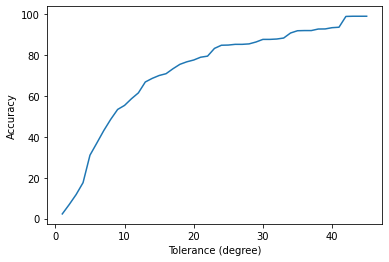

In [5]:
print(acc2[-1])
plt.plot(ang_tol, acc2)
plt.xlabel('Tolerance (degree)')
plt.ylabel('Accuracy')

# estimated combination of both

Text(0, 0.5, 'Angle Estimation Accuracy (%)')

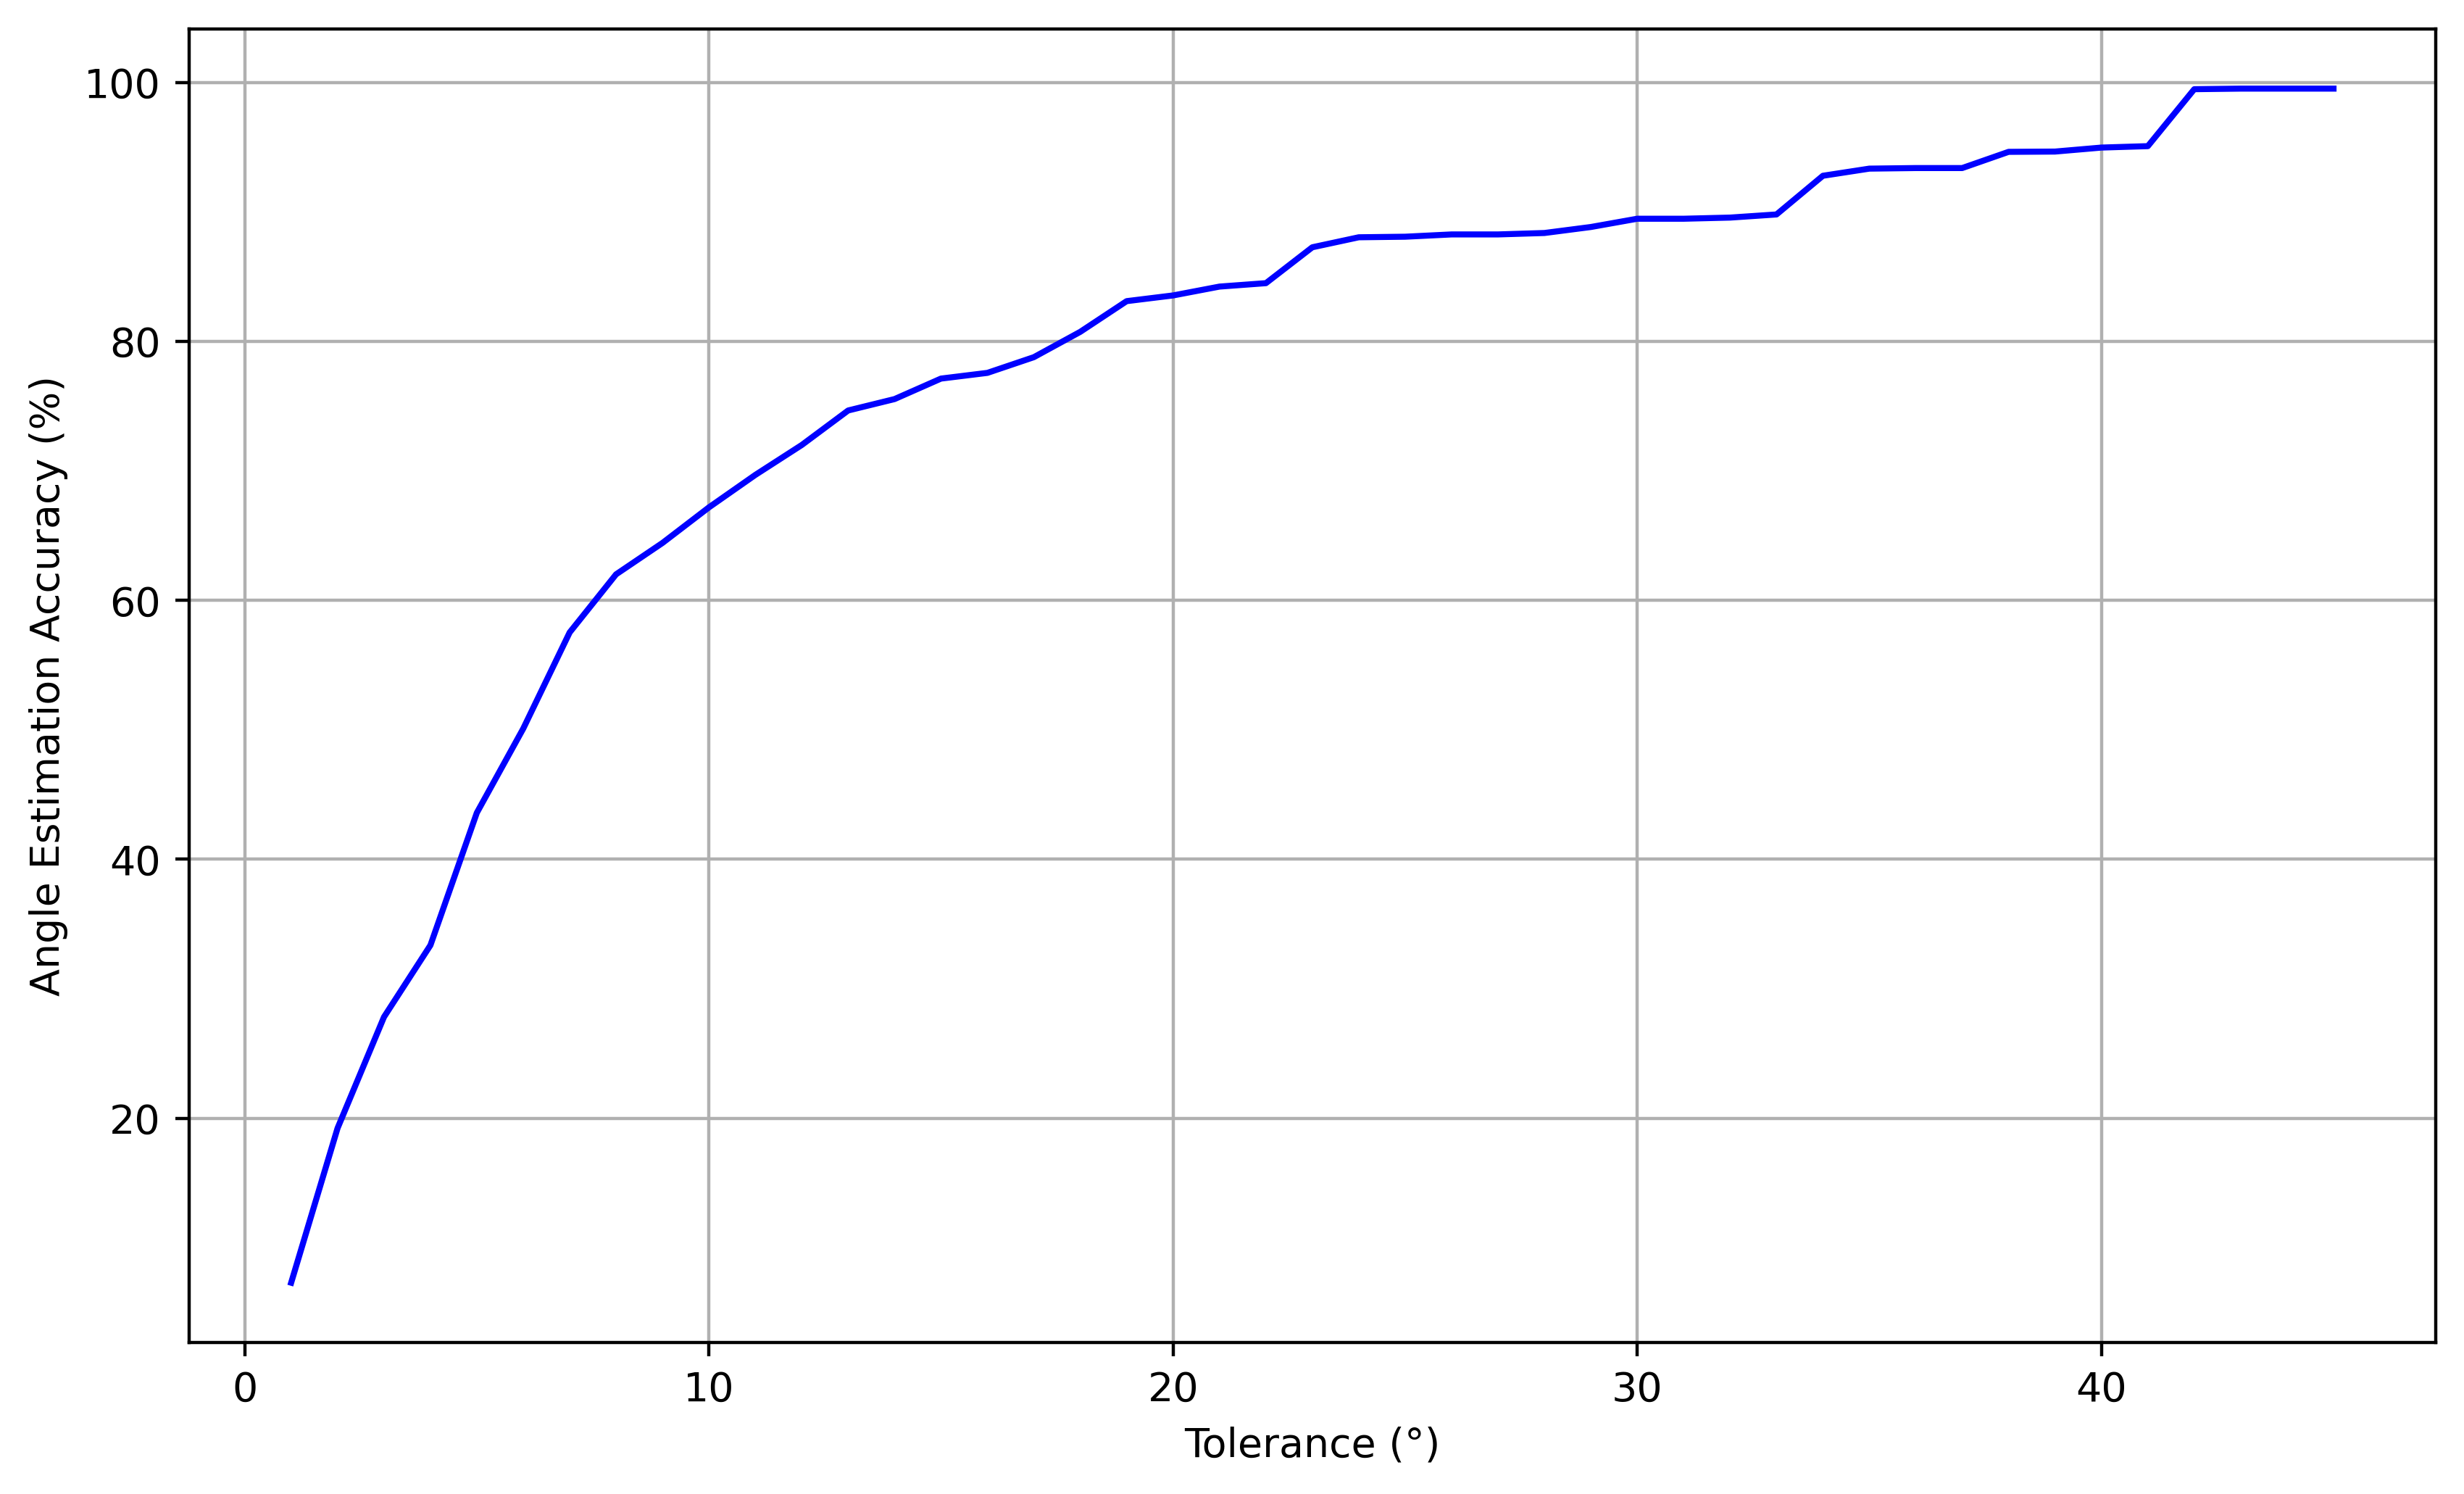

In [6]:
combined_acc = [((acc1[i]*len(acc1))+ (acc2[i]*len(acc2))) / (len(acc1) + len(acc2)) for i in range(len(ang_tol))]
fig = plt.figure(figsize=(10, 6), dpi=400)
plt.plot(ang_tol, combined_acc, 'b')
plt.grid(True)
plt.xlabel(u'Tolerance (\N{DEGREE SIGN})')
plt.ylabel('Angle Estimation Accuracy (%)')

# real two target case

In [7]:
path = '../data/est_projected_microDoppler/*_proj*.png'
files1 = glob.glob(path)
print(len(files1), 'files')
ang_tol = range(1,46)
acc3 = []

for t in ang_tol:
    
    correct = 0
    wrong = 0
    for i in range(len(files1)):
        fname = files1[i].split('/')[-1]
        if '\\' in fname:
            fname = fname.split('\\')[-1]
        class_idx = [m.end() for m in re.finditer('class', fname)]
        underscore_idx = [m.start() for m in re.finditer('_', fname)]
        classes = np.array([int(c) for c in fname[class_idx[0]: underscore_idx[1]].split('-')])

        angles = fname.split('_')[2][3:]
        plusses = angles.rfind('+')
        minuses = angles.rfind('-')

        if plusses == -1 and minuses == -1:
            all_ang_ids = int(angles)
            angs = all_ang_ids
        elif plusses == -1 and minuses != -1:
            all_ang_ids = sorted([minuses, len(angles)+1])
        elif plusses != -1 and minuses == -1:
            all_ang_ids = sorted([plusses, len(angles)+1])
        else:
            all_ang_ids = sorted([plusses, minuses, len(angles)+1])

        if isinstance(all_ang_ids, list):
            if all_ang_ids[0] == 0:
                angs = np.zeros((len(all_ang_ids) - 1,), dtype=int)
                for x in range(len(all_ang_ids) - 1):
                    angs[x] = int(angles[all_ang_ids[x]:all_ang_ids[x+1]]) # .astype(int)
            else:
                angs = np.zeros((len(all_ang_ids),), dtype=int)
                angs[0] = int(angles[:all_ang_ids[0]])
                for x in range(len(all_ang_ids) - 1):
                    angs[x+1] = int(angles[all_ang_ids[x]:all_ang_ids[x+1]]) # .astype(int)
        proj_ang = int(fname[fname.find('proj')+4: -4])
        
        if len(angs) != 2:
            continue

        if sum([abs(proj_ang - a) < t for a in angs]) > 0:
            correct += 1
        else:
#             print(i, '. sample')
#             print(proj_ang)
#             print(a)
#             print(t)
            wrong += 1
    acc3.append(correct/(correct + wrong) * 100)

57 files


100.0


Text(0, 0.5, 'Accuracy')

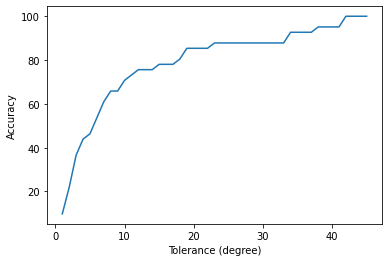

In [8]:
print(acc3[-1])
plt.plot(ang_tol, acc3)
plt.xlabel('Tolerance (degree)')
plt.ylabel('Accuracy')

# real three target case

In [9]:
path = '../data/est_projected_microDoppler/*_proj*.png'
files1 = glob.glob(path)
print(len(files1), 'files')
ang_tol = range(1,46)
acc4 = []

for t in ang_tol:
    
    correct = 0
    wrong = 0
    for i in range(len(files1)):
        fname = files1[i].split('/')[-1]
        if '\\' in fname:
            fname = fname.split('\\')[-1]
        class_idx = [m.end() for m in re.finditer('class', fname)]
        underscore_idx = [m.start() for m in re.finditer('_', fname)]
        classes = np.array([int(c) for c in fname[class_idx[0]: underscore_idx[1]].split('-')])

        angles = fname.split('_')[2][3:]
        plusses = angles.rfind('+')
        minuses = angles.rfind('-')

        if plusses == -1 and minuses == -1:
            all_ang_ids = int(angles)
            angs = all_ang_ids
        elif plusses == -1 and minuses != -1:
            all_ang_ids = sorted([minuses, len(angles)+1])
        elif plusses != -1 and minuses == -1:
            all_ang_ids = sorted([plusses, len(angles)+1])
        else:
            all_ang_ids = sorted([plusses, minuses, len(angles)+1])

        if isinstance(all_ang_ids, list):
            if all_ang_ids[0] == 0:
                angs = np.zeros((len(all_ang_ids) - 1,), dtype=int)
                for x in range(len(all_ang_ids) - 1):
                    angs[x] = int(angles[all_ang_ids[x]:all_ang_ids[x+1]]) # .astype(int)
            else:
                angs = np.zeros((len(all_ang_ids),), dtype=int)
                angs[0] = int(angles[:all_ang_ids[0]])
                for x in range(len(all_ang_ids) - 1):
                    angs[x+1] = int(angles[all_ang_ids[x]:all_ang_ids[x+1]]) # .astype(int)
        proj_ang = int(fname[fname.find('proj')+4: -4])
        
        if len(angs) != 3:
            continue

        if sum([abs(proj_ang - a) < t for a in angs]) > 0:
            correct += 1
        else:
#             print(i, '. sample')
#             print(proj_ang)
#             print(a)
#             print(t)
            wrong += 1
    acc4.append(correct/(correct + wrong) * 100)

57 files


100.0


Text(0, 0.5, 'Accuracy')

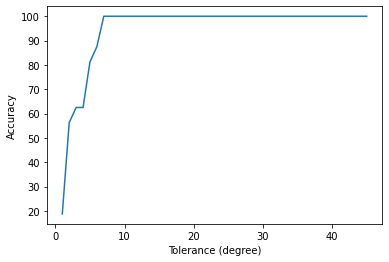

In [10]:
print(acc4[-1])
plt.plot(ang_tol, acc4)
plt.xlabel('Tolerance (degree)')
plt.ylabel('Accuracy')

# synt two target case

In [11]:
path = '../data/est_*/*_proj*.png'
files2 = glob.glob(path)
files2 = [f for f in files2 if 'est_projected' not in f]
print(len(files2), 'files')
acc5 = []

for t in ang_tol:
    correct = 0
    wrong = 0
    for i in range(len(files2)):
        fname = files2[i].split('/')[-1]
        if '\\' in fname:
            fname = fname.split('\\')[-1]
        class_idx = [m.end() for m in re.finditer('class', fname)]
        ang_idx = [m.end() for m in re.finditer('ang', fname)]
        underscore_idx = [m.start() for m in re.finditer('_', fname)]
        classes = []
        classes.append(int(fname[class_idx[0]: underscore_idx[1]]))
        classes.append(int(fname[class_idx[1]: underscore_idx[5]]))
        if len(underscore_idx) == 12: # if 3 targets
            classes.append(int(fname[class_idx[2]: underscore_idx[9]]))
        angs = []
        angs.append(int(fname[ang_idx[0]: underscore_idx[2]]))
        angs.append(int(fname[ang_idx[1]: underscore_idx[6]]))
        if len(underscore_idx) == 12: # if 3 targets
            angs.append(int(fname[ang_idx[2]: underscore_idx[10]]))
        proj_ang = int(fname[fname.find('proj')+4: -4])
        
        if len(angs) != 2:
            continue
        
        if sum([abs(proj_ang - a) < t for a in angs]) > 0:
            correct += 1
        else:
            wrong += 1
    acc5.append(correct/(correct + wrong) * 100)

2268 files


98.75370919881306


Text(0, 0.5, 'Accuracy')

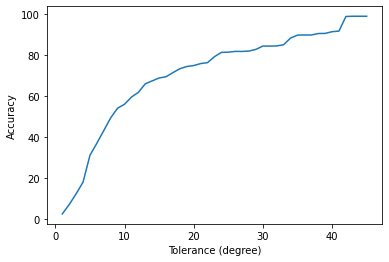

In [12]:
print(acc5[-1])
plt.plot(ang_tol, acc5)
plt.xlabel('Tolerance (degree)')
plt.ylabel('Accuracy')

# synt three target case

In [13]:
path = '../data/est_*/*_proj*.png'
files2 = glob.glob(path)
files2 = [f for f in files2 if 'est_projected' not in f]
print(len(files2), 'files')
acc6 = []

for t in ang_tol:
    correct = 0
    wrong = 0
    for i in range(len(files2)):
        fname = files2[i].split('/')[-1]
        if '\\' in fname:
            fname = fname.split('\\')[-1]
        class_idx = [m.end() for m in re.finditer('class', fname)]
        ang_idx = [m.end() for m in re.finditer('ang', fname)]
        underscore_idx = [m.start() for m in re.finditer('_', fname)]
        classes = []
        classes.append(int(fname[class_idx[0]: underscore_idx[1]]))
        classes.append(int(fname[class_idx[1]: underscore_idx[5]]))
        if len(underscore_idx) == 12: # if 3 targets
            classes.append(int(fname[class_idx[2]: underscore_idx[9]]))
        angs = []
        angs.append(int(fname[ang_idx[0]: underscore_idx[2]]))
        angs.append(int(fname[ang_idx[1]: underscore_idx[6]]))
        if len(underscore_idx) == 12: # if 3 targets
            angs.append(int(fname[ang_idx[2]: underscore_idx[10]]))
        proj_ang = int(fname[fname.find('proj')+4: -4])
        
        if len(angs) != 3:
            continue
        
        if sum([abs(proj_ang - a) < t for a in angs]) > 0:
            correct += 1
        else:
            wrong += 1
    acc6.append(correct/(correct + wrong) * 100)

2268 files


100.0


Text(0, 0.5, 'Accuracy')

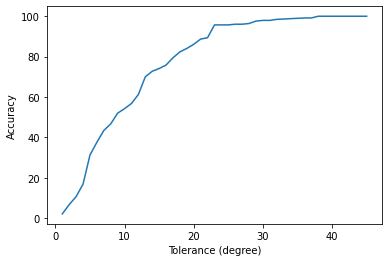

In [14]:
print(acc6[-1])
plt.plot(ang_tol, acc6)
plt.xlabel('Tolerance (degree)')
plt.ylabel('Accuracy')

# combine all

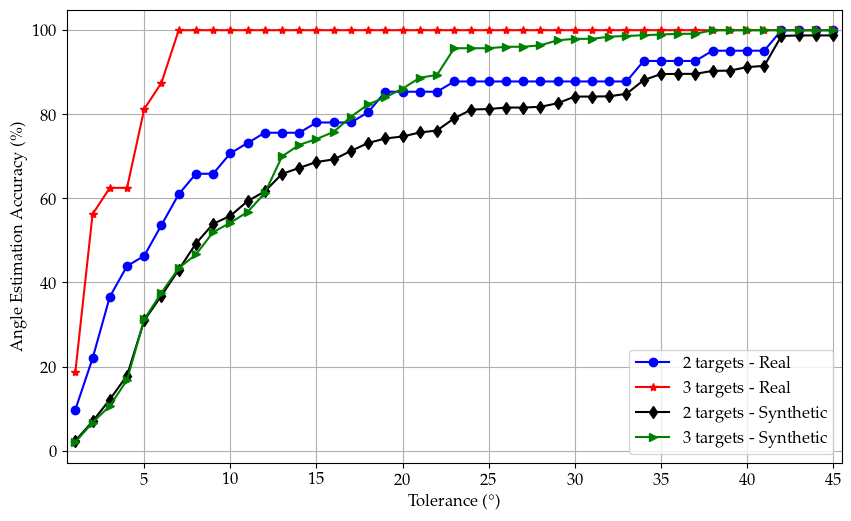

In [33]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.sans-serif": ["Palatino"]}) # Computer Modern, Palatino, Lucida Grande

fontsize = 12

fig = plt.figure(figsize=(10, 6), dpi=100)
p1, = plt.plot(ang_tol, acc3, 'bo-')
p2, = plt.plot(ang_tol, acc4, 'r*-')
p3, = plt.plot(ang_tol, acc5, 'kd-')
p4, = plt.plot(ang_tol, acc6, 'g>-')

plt.grid(which='both')
plt.xticks(fontsize = fontsize)
plt.yticks(fontsize = fontsize)
plt.xlim([0.5, 45.5])
plt.xlabel(u'Tolerance (\N{DEGREE SIGN})', fontsize = fontsize)
plt.ylabel('Angle Estimation Accuracy (\%)', fontsize = fontsize)
plt.legend([p1, p2, p3, p4], ['2 targets - Real', '3 targets - Real', '2 targets - Synthetic', '3 targets - Synthetic'],
          fontsize = fontsize)
plt.savefig(r'..\results\ang_est_results.pdf', bbox_inches='tight')